In [71]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import GridSearchCV, cross_val_score 
from sklearn.svm import SVC 
import pickle

In [72]:
data = pd.read_csv(r'E:\Projects\Flask (Projects)\Wine_Quality_Test_Project (Flask)\Project\Dataset\winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [73]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [74]:
df = data.select_dtypes(include='object')
df.head()

,type
0,white
1,white
2,white
3,white
4,white


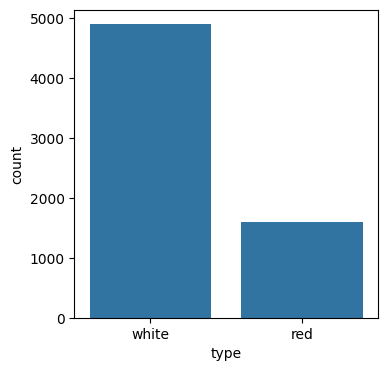

In [75]:
plt.figure(figsize=(18, 4))
for i, j in enumerate(df):
    plt.subplot(1, 4, i+1)
    sns.countplot(x=j, data=df)

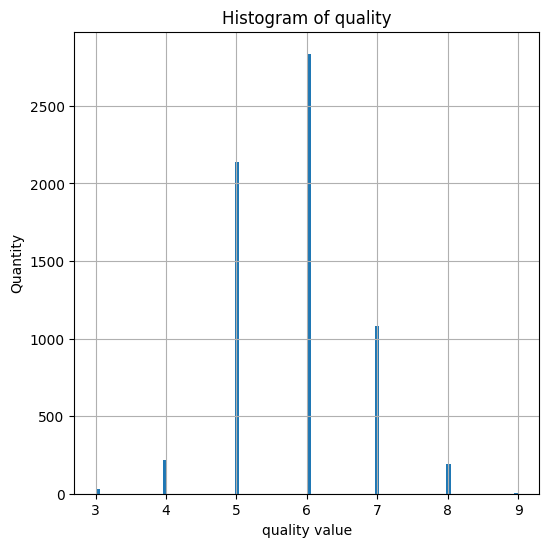

In [76]:
axarr = data.hist(column=['quality'], bins=100, figsize=(6, 6))
ax = axarr.flatten()[0]
ax.set_xlabel(f"{ax.get_title()} value")
ax.set_ylabel("Quantity")
title = ax.get_title()
ax.set_title(f"Histogram of {title}")
plt.show()

C:\Users\Kethe_Mukesh\AppData\Local\Temp\ipykernel_9972\1211288598.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


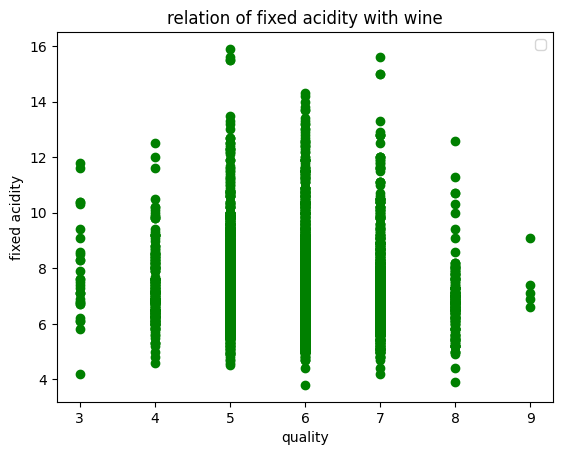

In [77]:
plt.scatter(data['quality'],data['fixed acidity'],color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show ()

C:\Users\Kethe_Mukesh\AppData\Local\Temp\ipykernel_9972\1089976691.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


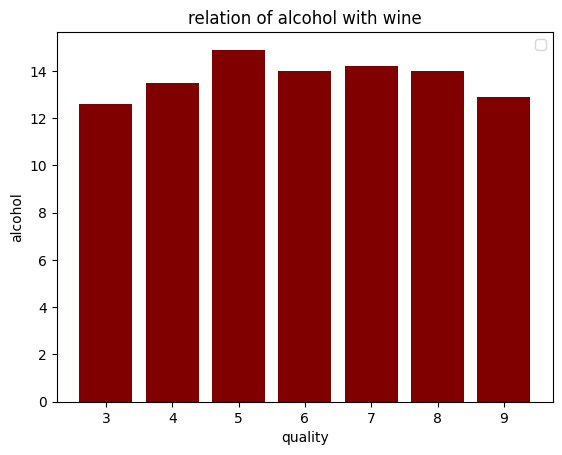

In [78]:
plt.bar(data['quality'],data['alcohol'],color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel ('alcohol')
plt.legend()
plt.show ()

<Axes: xlabel='quality', ylabel='citric acid'>

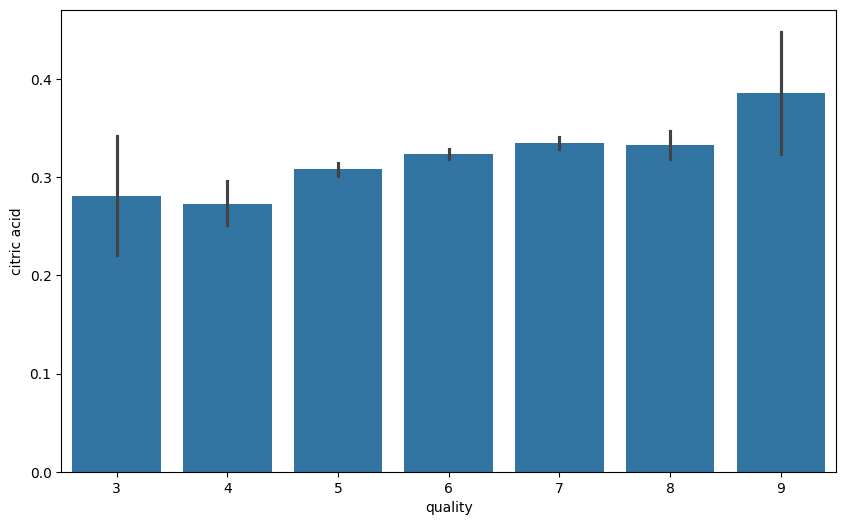

In [79]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x ='quality', y ='citric acid', data = data)

<Axes: xlabel='quality', ylabel='residual sugar'>

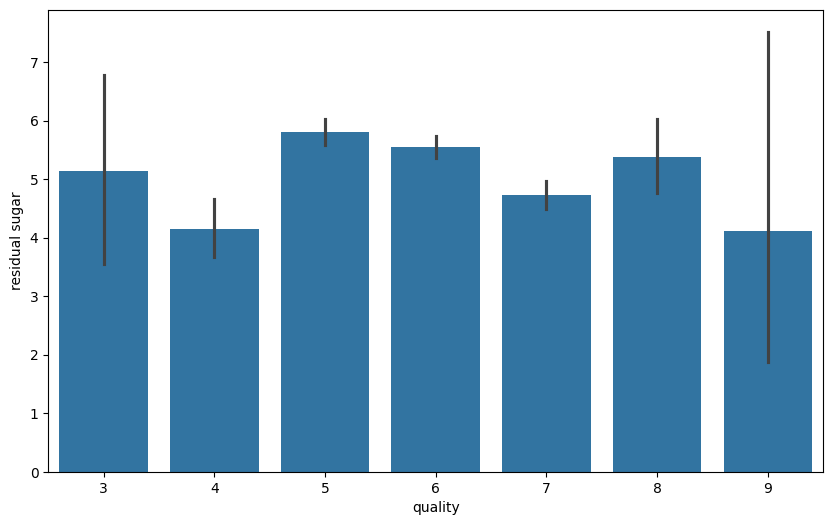

In [80]:
fig = plt. figure(figsize = (10,6))
sns.barplot (x = 'quality', y = 'residual sugar', data = data)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

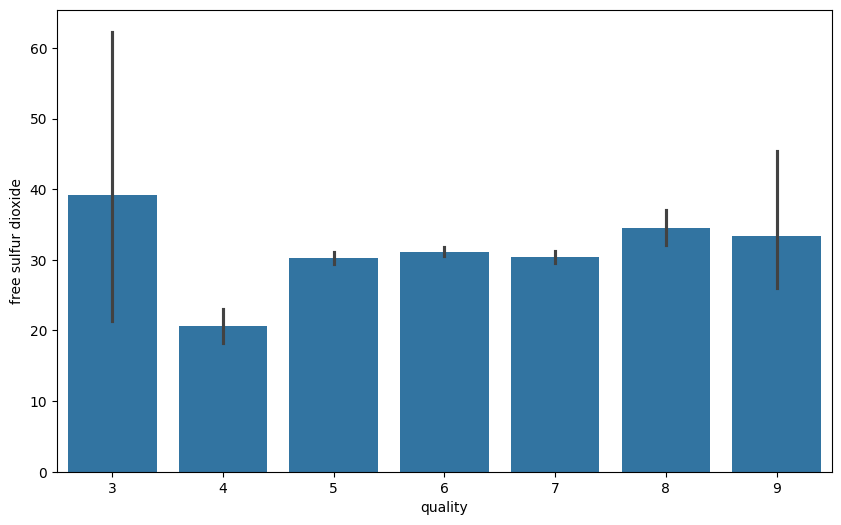

In [81]:
fig = plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

<Axes: xlabel='quality', ylabel='sulphates'>

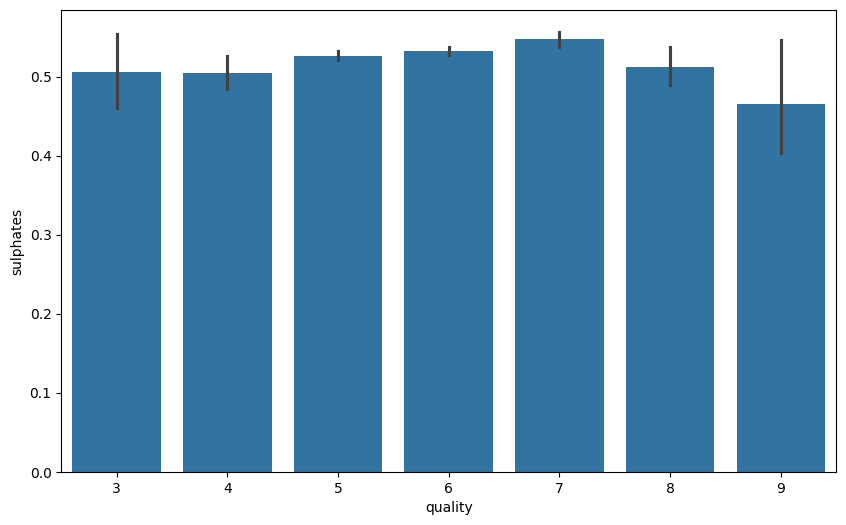

In [82]:
fig = plt.figure(figsize = (10,6) )
sns.barplot(x = 'quality', y = 'sulphates', data = data)

<Axes: xlabel='quality', ylabel='chlorides'>

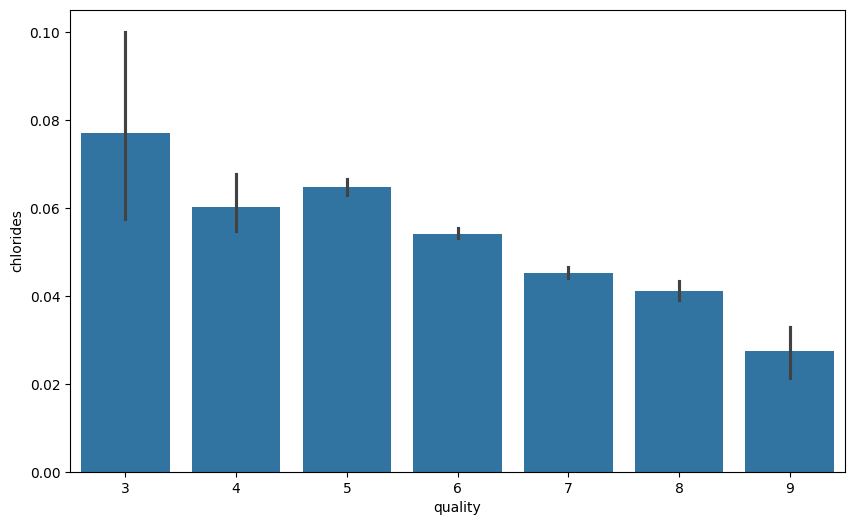

In [83]:
fig = plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

In [84]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [85]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [86]:
data = data.drop(['volatile acidity', 'total sulfur dioxide', 'chlorides','density'], axis = 1)

print (data. shape)

(6497, 9)


In [87]:
data['quality'] = data['quality'].map({3 : 'bad', 4 : 'bad', 5: 'bad',6: 'good', 7: 'good', 8: 'good'})
data ['quality'].value_counts()

quality
good    4108
bad     2384
Name: count, dtype: int64

In [88]:
data.isnull().any()

type                   False
fixed acidity           True
citric acid             True
residual sugar          True
free sulfur dioxide    False
pH                      True
sulphates               True
alcohol                False
quality                 True
dtype: bool

In [89]:
data.isnull().sum()

type                    0
fixed acidity          10
citric acid             3
residual sugar          2
free sulfur dioxide     0
pH                      9
sulphates               4
alcohol                 0
quality                 5
dtype: int64

In [90]:
data["fixed acidity"].fillna(data["fixed acidity"].mean(),inplace = True)
data["sulphates"].fillna(data["sulphates"].mean(),inplace = True)
data["pH"].fillna(data["pH"].mean(),inplace = True)
data["residual sugar"].fillna(data["residual sugar"].mean(),inplace = True)
data["citric acid"].fillna(data["citric acid"].mean(),inplace = True)
data["quality"].fillna(data["quality"].mode()[0],inplace=True)

C:\Users\Kethe_Mukesh\AppData\Local\Temp\ipykernel_9972\916259726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["fixed acidity"].fillna(data["fixed acidity"].mean(),inplace = True)
C:\Users\Kethe_Mukesh\AppData\Local\Temp\ipykernel_9972\916259726.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [91]:
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])
data['type'] = le.fit_transform(data['type'])

In [92]:
x = data.iloc[:,:8]
y = data.iloc[:,8:9]
print(x.shape)
print (y.shape)

(6497, 8)
(6497, 1)


In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)
print (x_train. shape)
print (y_train.shape)
print(x_test.shape)
print (y_test.shape)

(4872, 8)
(4872, 1)
(1625, 8)
(1625, 1)


In [94]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [95]:
def logisticRegression(x_train, x_test, y_train, y_test):
    model = LogisticRegression()
    model.fit (x_train, y_train)
    y_pred = model.predict(x_test)
    print('***logisticRegression***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    print (classification_report(y_test, y_pred))
    print (confusion_matrix(y_test, y_pred))

In [96]:
def SGD(x_train, x_test, y_train, y_test):
    model = SGDClassifier(penalty=None)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('***Stochastic Gradient Descent Classifier***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [97]:
def SVClassifier(x_train, x_test, y_train, y_test) :
    model = SVC()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('***Support Vector Classifier***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [98]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print("Training accuracy :", dt.score(x_train, y_train))
    print("Testing accuracy :", dt.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,y_pred))
    print('Classification report')
    print (classification_report (y_test,y_pred))

In [99]:
def randomForest(x_train, x_test, y_train, y_test) :
    rf = RandomForestClassifier ()
    rf.fit (x_train,y_train)
    y_pred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print("Training accuracy :" , rf.score(x_train, y_train)) 
    print("Testing accuracy :", rf.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,y_pred))
    print('Classification report')
    print(classification_report(y_test,y_pred))

In [100]:
def xgboost(x_train, x_test, y_train, y_test) :
    xg = GradientBoostingClassifier()
    xg.fit (x_train, y_train) 
    y_pred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print("Training accuracy :", xg.score(x_train, y_train))
    print("Testing accuracy :" , xg.score(x_test, y_test))
    print('Confusion matrix')
    print (confusion_matrix(y_test,y_pred))
    print('Classification report')
    print(classification_report(y_test,y_pred))

In [101]:
def compareModel(x_train, x_test, y_train, y_test):
    logisticRegression(x_train, x_test, y_train, y_test)
    print('-'*100)
    SGD(x_train, x_test, y_train, y_test)
    print('-'*100)
    SVClassifier(x_train, x_test, y_train, y_test)
    print('-'*100)
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train,x_test, y_train, y_test)
    print('-'*100)

compareModel(x_train, x_test, y_train, y_test)


c:\Users\Kethe_Mukesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kethe_Mukesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***logisticRegression***
Training accuracy : 0.7066912972085386
Testing accuracy : 0.6904615384615385
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       584
           1       0.74      0.80      0.77      1041

    accuracy                           0.69      1625
   macro avg       0.66      0.65      0.65      1625
weighted avg       0.68      0.69      0.69      1625

[[294 290]
 [213 828]]
----------------------------------------------------------------------------------------------------
***Stochastic Gradient Descent Classifier***
Training accuracy : 0.666871921182266
Testing accuracy : 0.6541538461538462
              precision    recall  f1-score   support

           0       0.53      0.31      0.39       584
           1       0.69      0.85      0.76      1041

    accuracy                           0.65      1625
   macro avg       0.61      0.58      0.57      1625
weighted avg       0.63      0.65      0.63      1625


c:\Users\Kethe_Mukesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***Support Vector Classifier***
Training accuracy : 0.7676518883415435
Testing accuracy : 0.7304615384615385
              precision    recall  f1-score   support

           0       0.65      0.55      0.59       584
           1       0.77      0.83      0.80      1041

    accuracy                           0.73      1625
   macro avg       0.71      0.69      0.70      1625
weighted avg       0.72      0.73      0.72      1625

[[321 263]
 [175 866]]
----------------------------------------------------------------------------------------------------
***DecisionTreeClassifier***
Training accuracy : 1.0
Testing accuracy : 0.7076923076923077
Confusion matrix
[[371 213]
 [262 779]]
Classification report
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       584
           1       0.79      0.75      0.77      1041

    accuracy                           0.71      1625
   macro avg       0.69      0.69      0.69      1625
weighted avg   

c:\Users\Kethe_Mukesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


***RandomForestClassifier***
Training accuracy : 1.0
Testing accuracy : 0.8098461538461539
Confusion matrix
[[404 180]
 [129 912]]
Classification report
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       584
           1       0.84      0.88      0.86      1041

    accuracy                           0.81      1625
   macro avg       0.80      0.78      0.79      1625
weighted avg       0.81      0.81      0.81      1625

----------------------------------------------------------------------------------------------------


c:\Users\Kethe_Mukesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***GradientBoostingClassifier***
Training accuracy : 0.791871921182266
Testing accuracy : 0.7390769230769231
Confusion matrix
[[347 237]
 [187 854]]
Classification report
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       584
           1       0.78      0.82      0.80      1041

    accuracy                           0.74      1625
   macro avg       0.72      0.71      0.71      1625
weighted avg       0.73      0.74      0.74      1625

----------------------------------------------------------------------------------------------------


In [102]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
confusion_matrix(y_test,y_pred)

c:\Users\Kethe_Mukesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([[399, 185],
       [120, 921]])

In [103]:
model_eval = cross_val_score(estimator=rf_model, X=x_train, y=y_train, cv=5) 
model_eval.mean()

c:\Users\Kethe_Mukesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Kethe_Mukesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Kethe_Mukesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Kethe_Mukesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklea

np.float64(0.8021336281788027)

In [104]:
pickle.dump(rf_model,open('wineQuality_new.pkl','wb'))